In [1]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [34]:
datapred = pd.read_csv('../Final_Data/predicted_2013.csv', parse_dates=[1], infer_datetime_format=True)
datapred.head()

,Unnamed: 0,Datetime,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH,Consumption,Income,Overall,Month,DayofWeek,Hour,WeekofYear,Year,predicted
0,26283,2013-01-01 00:00:00,44.6,87,48.2,9.2,0.214885,Income1,0.250803,Month1,DayofWeek1,Hour0,WeekofYear1,Year2013,0.377405
1,26284,2013-01-01 00:00:00,44.6,87,48.2,9.2,0.244850,Income2,0.250803,Month1,DayofWeek1,Hour0,WeekofYear1,Year2013,0.414056
2,26285,2013-01-01 00:00:00,44.6,87,48.2,9.2,0.284734,Income3,0.250803,Month1,DayofWeek1,Hour0,WeekofYear1,Year2013,0.488273
3,26286,2013-01-01 01:00:00,44.6,87,48.2,10.4,0.387206,Income1,0.442699,Month1,DayofWeek1,Hour1,WeekofYear1,Year2013,0.405406
4,26287,2013-01-01 01:00:00,44.6,87,48.2,10.4,0.426540,Income2,0.442699,Month1,DayofWeek1,Hour1,WeekofYear1,Year2013,0.442057


In [35]:
data_low = datapred[datapred.Income == "Income1"]
data_med = datapred[datapred.Income == "Income2"]
data_high = datapred[datapred.Income == "Income3"]

In [36]:
data_low.describe()

,Unnamed: 0,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH,Consumption,Overall,predicted
count,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000,8634.000000
mean,39381.091035,43.728793,75.748784,51.782326,9.280056,0.354548,0.421649,0.377124
std,7556.985313,10.283183,16.731803,12.056061,4.684955,0.118138,0.150195,0.138988
min,26283.000000,14.000000,8.000000,24.800000,1.200000,0.159034,0.186124,0.062381
25%,32841.750000,35.600000,66.000000,42.800000,5.800000,0.271400,0.314848,0.277724
50%,39367.500000,44.600000,81.000000,51.800000,8.100000,0.345318,0.402702,0.364062
75%,45920.250000,51.800000,88.000000,60.800000,11.500000,0.420826,0.505934,0.474987
max,52509.000000,68.000000,100.000000,91.400000,39.100000,0.732754,0.942716,0.793008


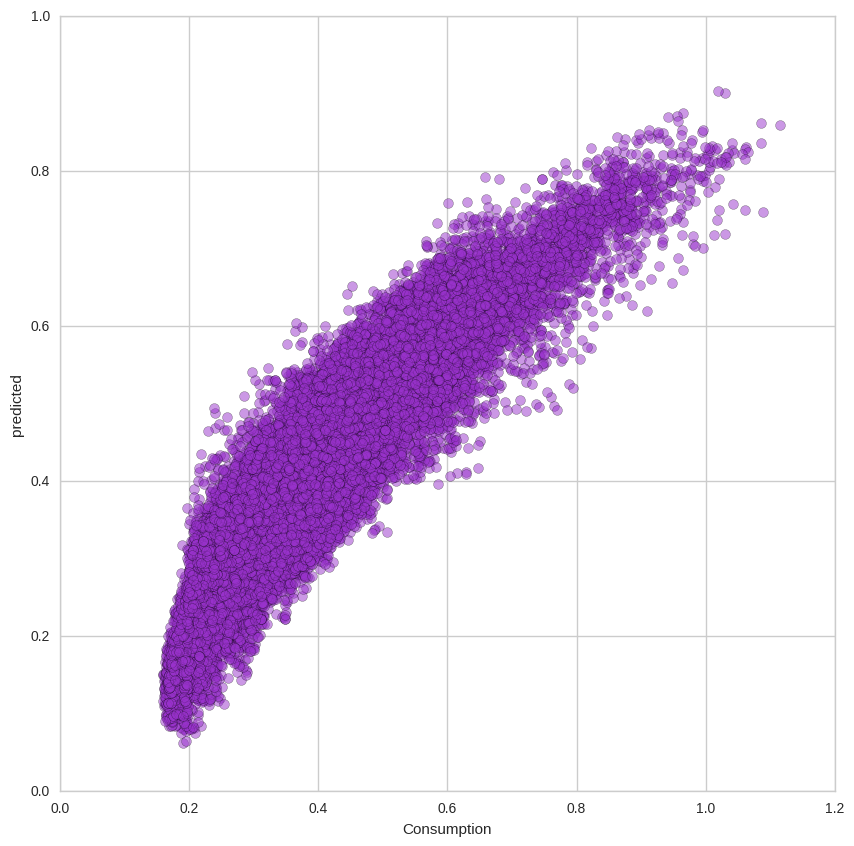

In [37]:
# overall
sns.set_style("whitegrid")
ax = pl.figure(figsize=(10,10)).add_subplot(111)
datapred.plot(kind='scatter', x='Consumption', y='predicted', color='darkorchid',s=50, alpha=.5, ax=ax)

pl.show()


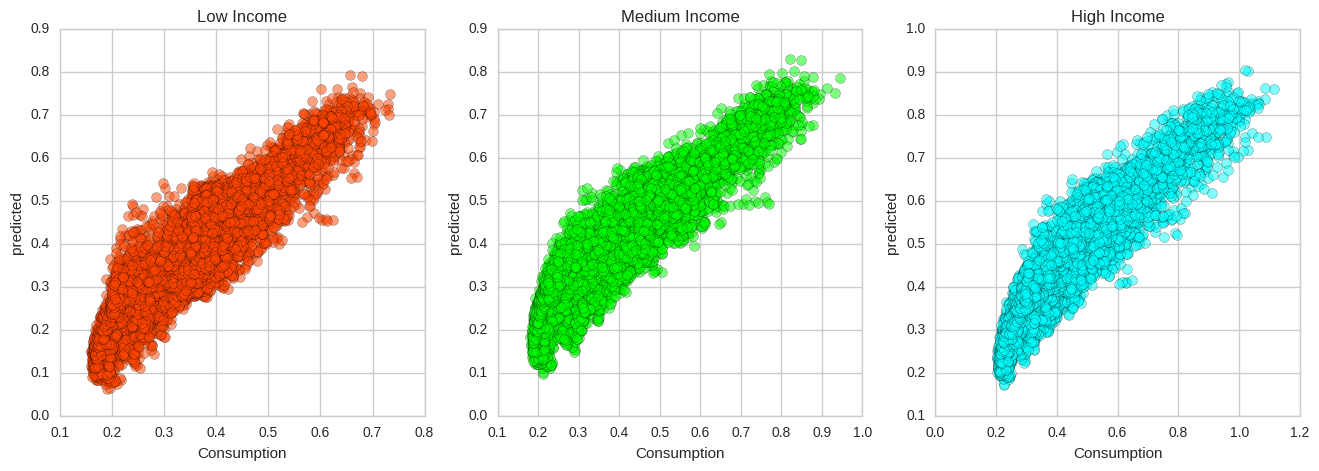

In [38]:
sns.set_style("whitegrid")

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))

data_low.plot(kind='scatter', x='Consumption', y='predicted', color='orangered',s=50, alpha=.5, ax=ax1)
data_med.plot(kind='scatter', x='Consumption', y='predicted', color='lime',s=50, alpha=.5, ax=ax2)
data_high.plot(kind='scatter', x='Consumption', y='predicted', color='cyan',s=50, alpha=.5, ax=ax3)

ax1.set_title('Low Income')
ax2.set_title('Medium Income')
ax3.set_title('High Income')

pl.show()


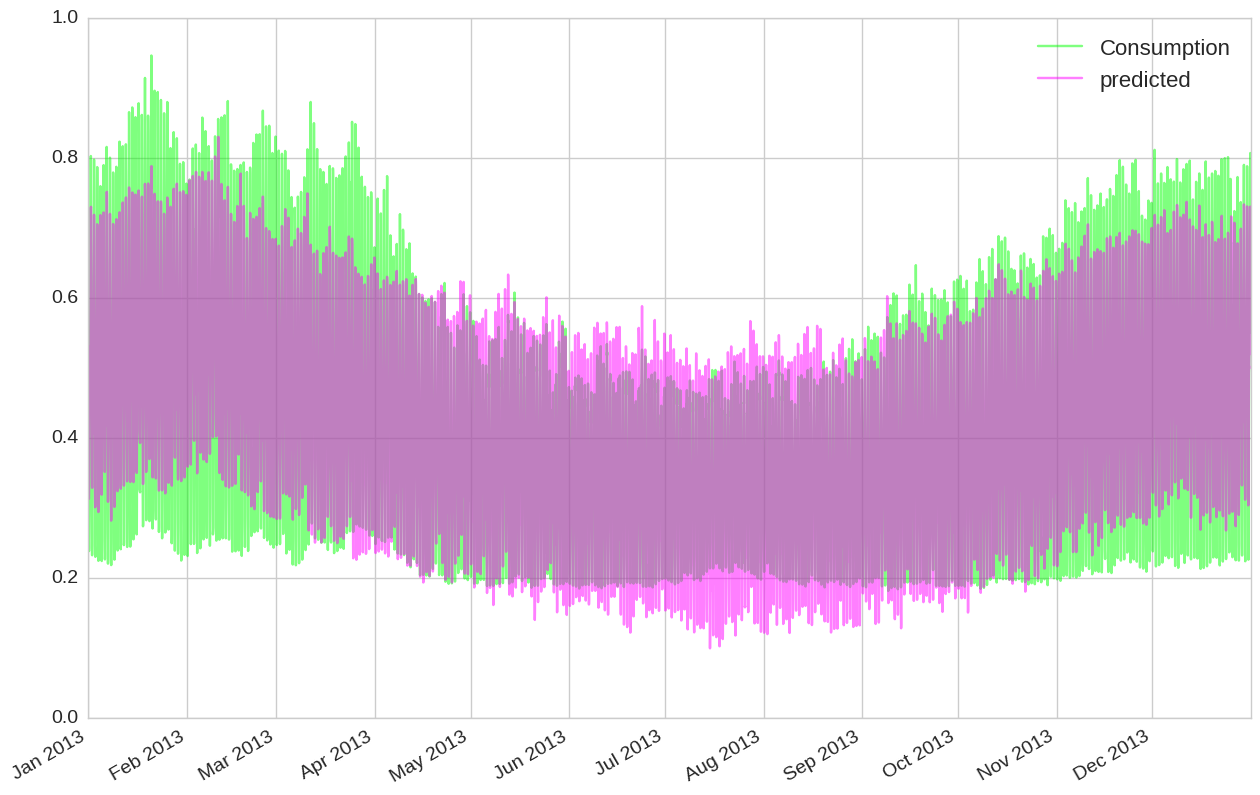

In [70]:
sns.set_style("whitegrid")
ax = pl.figure(figsize=(15,10)).add_subplot(111)

data_med.plot(x='Datetime', y='Consumption', color='lime',alpha=0.5, ax=ax)
data_med.plot(x='Datetime', y='predicted', color='magenta', alpha=0.5, ax=ax)

# ax.set_xlim('2013-04-10','2013-04-14')
# ax.set_ylim(0,0.8)

pl.setp(ax.get_xticklabels(), fontsize=14)
pl.setp(ax.get_yticklabels(), fontsize=14)
pl.xlabel('', fontsize = 10)
pl.legend(fontsize = 16)

pl.show()


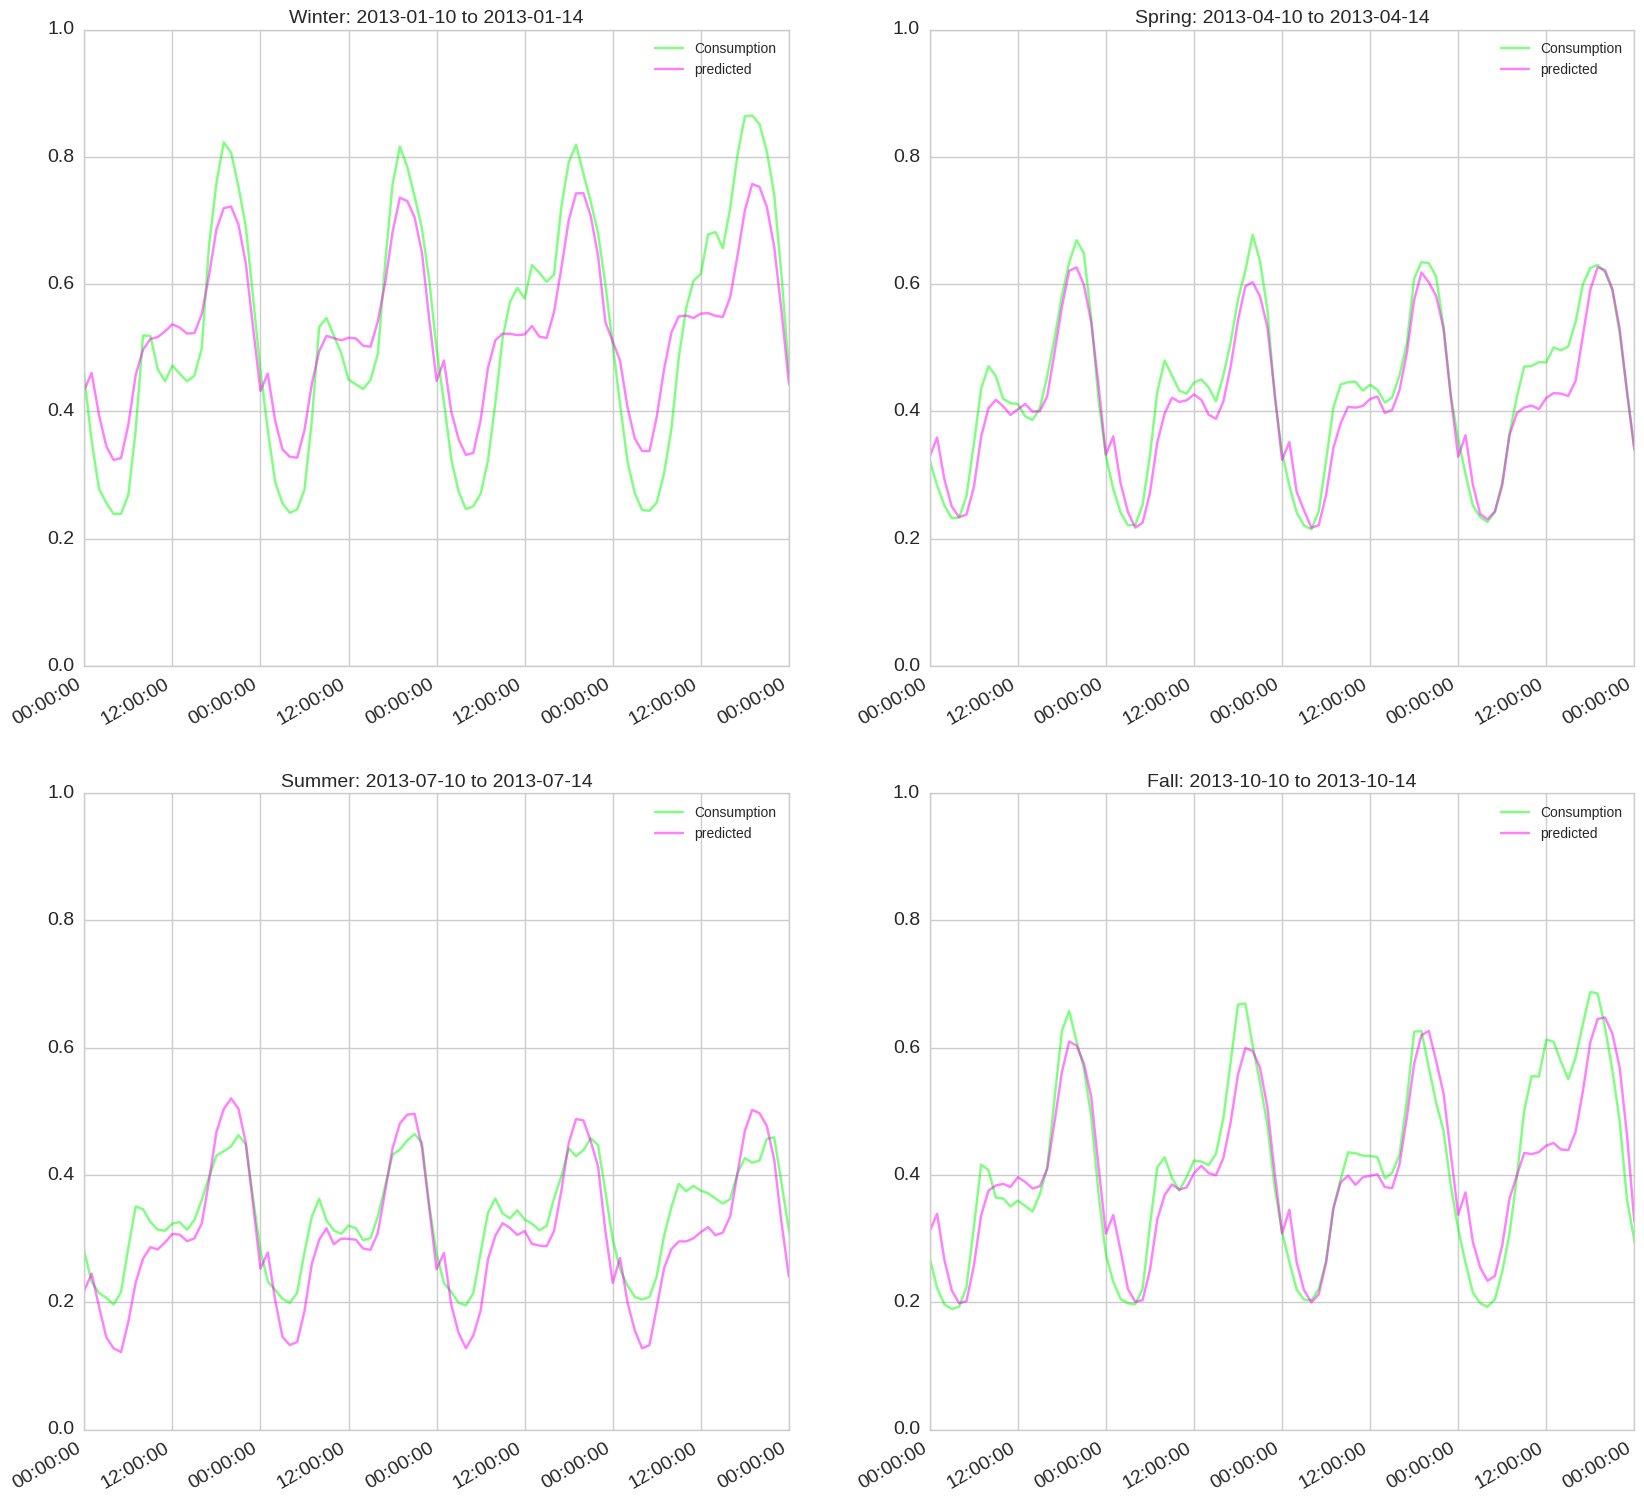

In [87]:
sns.set_style("whitegrid")

fig = pl.figure(figsize=(20,20))

ax1 = pl.subplot(2,2,1)
ax2 = pl.subplot(2,2,2)
ax3 = pl.subplot(2,2,3)
ax4 = pl.subplot(2,2,4)

data_med.plot(x='Datetime', y='Consumption', color='lime',alpha=0.5, ax=ax1)
data_med.plot(x='Datetime', y='predicted', color='magenta', alpha=0.5, ax=ax1)

data_med.plot(x='Datetime', y='Consumption', color='lime',alpha=0.5, ax=ax2)
data_med.plot(x='Datetime', y='predicted', color='magenta', alpha=0.5, ax=ax2)

data_med.plot(x='Datetime', y='Consumption', color='lime',alpha=0.5, ax=ax3)
data_med.plot(x='Datetime', y='predicted', color='magenta', alpha=0.5, ax=ax3)

data_med.plot(x='Datetime', y='Consumption', color='lime',alpha=0.5, ax=ax4)
data_med.plot(x='Datetime', y='predicted', color='magenta', alpha=0.5, ax=ax4)

ax1.set_title('Winter: 2013-01-10 to 2013-01-14', fontsize=14)
ax1.set_xlim('2013-01-10','2013-01-14')
#ax1.set_ylim(0,0.8)
ax1.set_xlabel('', fontsize = 10)


ax2.set_title('Spring: 2013-04-10 to 2013-04-14', fontsize=14)
ax2.set_xlim('2013-04-10','2013-04-14')
#ax2.set_ylim(0,0.8)
ax2.set_xlabel('', fontsize = 10)

ax3.set_title('Summer: 2013-07-10 to 2013-07-14', fontsize=14)
ax3.set_xlim('2013-07-10','2013-07-14')
#ax3.set_ylim(0,0.8)
ax3.set_xlabel('', fontsize = 10)

ax4.set_title('Fall: 2013-10-10 to 2013-10-14', fontsize=14)
ax4.set_xlim('2013-10-10','2013-10-14')
#ax4.set_ylim(0,0.8)
ax4.set_xlabel('', fontsize = 10)

pl.setp(ax1.get_xticklabels(), fontsize=14)
pl.setp(ax1.get_yticklabels(), fontsize=14)
pl.setp(ax2.get_xticklabels(), fontsize=14)
pl.setp(ax2.get_yticklabels(), fontsize=14)
pl.setp(ax3.get_xticklabels(), fontsize=14)
pl.setp(ax3.get_yticklabels(), fontsize=14)
pl.setp(ax4.get_xticklabels(), fontsize=14)
pl.setp(ax4.get_yticklabels(), fontsize=14)

pl.show()